Import the required libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target 
label. 

In [8]:
Insurance = pd.read_csv('insurance.csv')

In [9]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Explore the data using at least 3 data exploratory tools of your choosing in pandas and 
interpret your observation in a markdown cell of what form of predictive analysis that can 
be conducted on the data.

In [10]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We seem not to be missing any data, which is a good thing. Two sets of binary features - Sex and Smoker. Charges, which is the traget is a continuous data set, hence it is required that we carry out a regression analysis.

In [11]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
Insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Further evidence that we do not have missing values. Reason to celebrate!

In [18]:
Insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

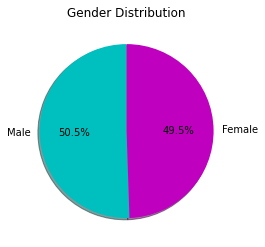

In [21]:
slices = Insurance['sex'].value_counts()
gender = ['Male','Female']
cols = ['c','m']

plt.pie(slices,
        labels=gender,
        colors=cols,
        startangle=90,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Gender Distribution')
plt.show()

There is a good distribution of Males and Females - almost equal of each.

Visualize the age distribution for the column ‘age’ and comment on the results in a 
markdown cell as well. (Ensure your visualization is of an appropriate size for effective 
analysis) 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



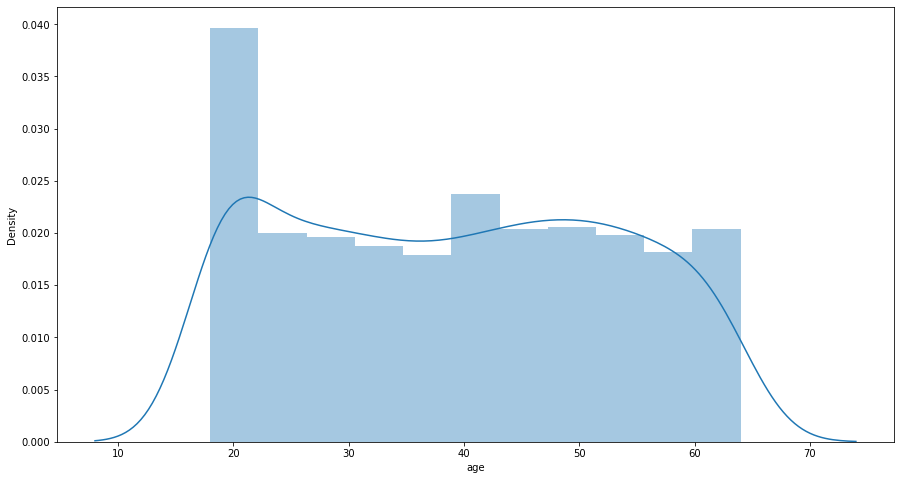

In [22]:
plt.figure(figsize=(15,8))
x = Insurance.age
ax = sns.distplot(x)

There is a normal distribution in the age feature

Isolate all the continuous and discrete columns into their respective lists named 
‘numerical_continuous’ and ‘numerical_discrete’ respectively. 

In [24]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
Numerical = [var for var in Insurance.columns if Insurance[var].dtype!='O']
print('There are {} numerical variables namely:'.format(len(Numerical)))
print(Numerical)

There are 4 numerical variables namely:
['age', 'bmi', 'children', 'charges']


In [32]:
numerical_discrete = []

for var in Numerical:
    if len(Insurance[var].unique())<20:
        print(var, ' values: ', Insurance[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


In [33]:
numerical_continuous = [var for var in Numerical if var not in numerical_discrete]
print('There are {} continuous variables namely:'.format(len(numerical_continuous)))
print(numerical_continuous)

There are 3 continuous variables namely:
['age', 'bmi', 'charges']


Visually identify if there is presence of any outliers in the numerical_continuous columns 
and resolve them using a zscore test and a threshold of your choosing.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

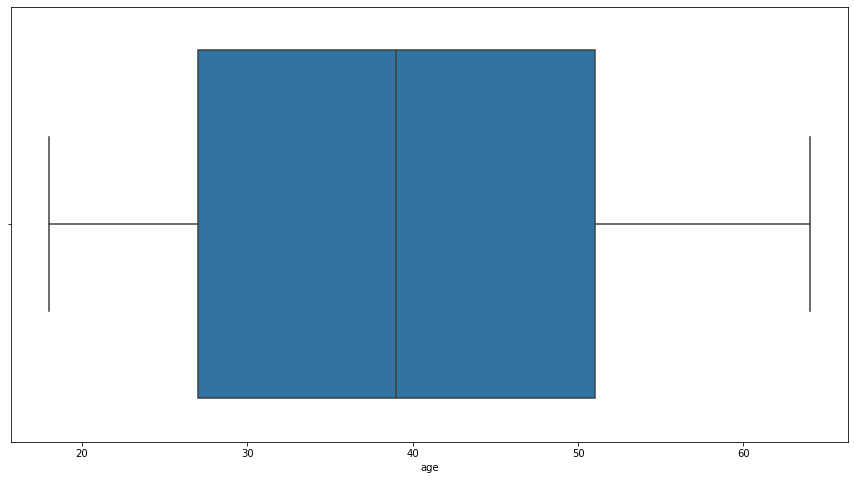

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.age)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bmi'>

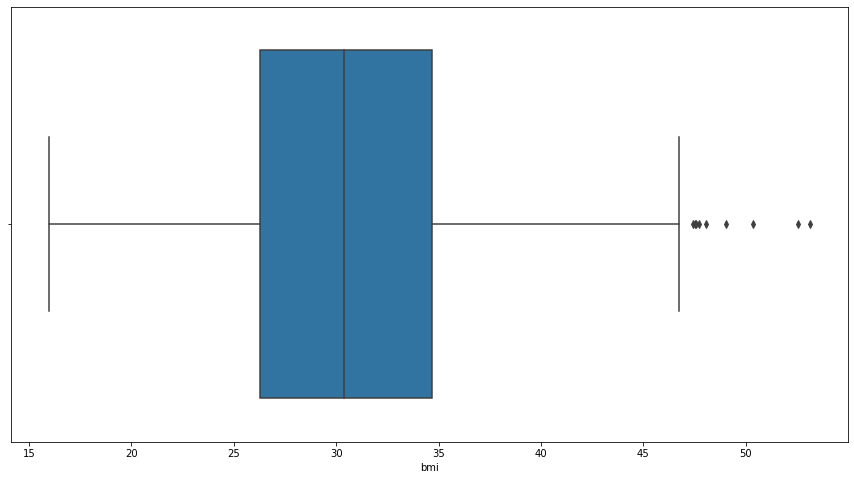

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.bmi)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='charges'>

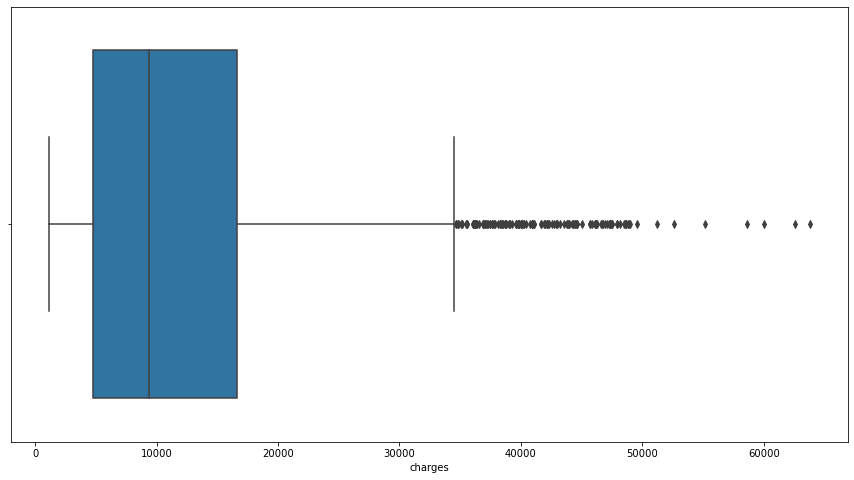

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.charges)

So we have outliers in the bmi and charges column. The age column seems to be fine.

In [38]:
def remove_outliers(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = 1.5*iqr
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outliers(Insurance.bmi)
Insurance = Insurance.loc[(Insurance.bmi>lower) & (Insurance.bmi<upper)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bmi'>

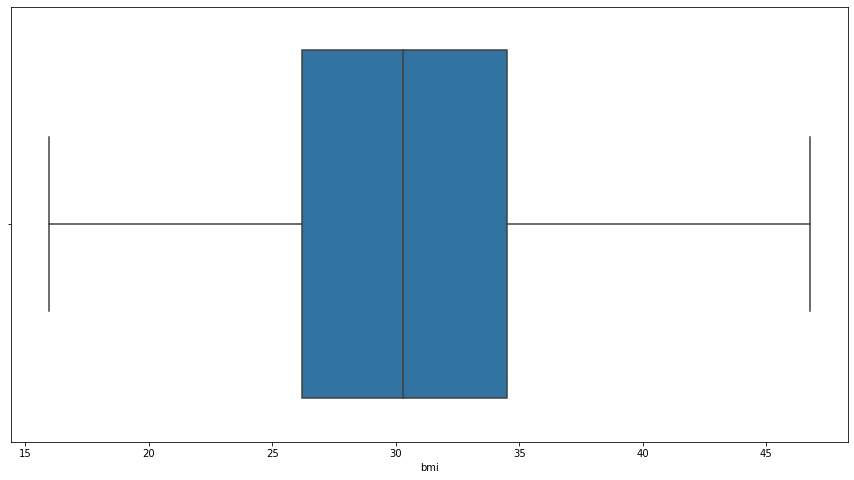

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.bmi)

In [42]:
lower, upper = remove_outliers(Insurance.charges)
Insurance = Insurance.loc[(Insurance.charges>lower) & (Insurance.charges<upper)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='charges'>

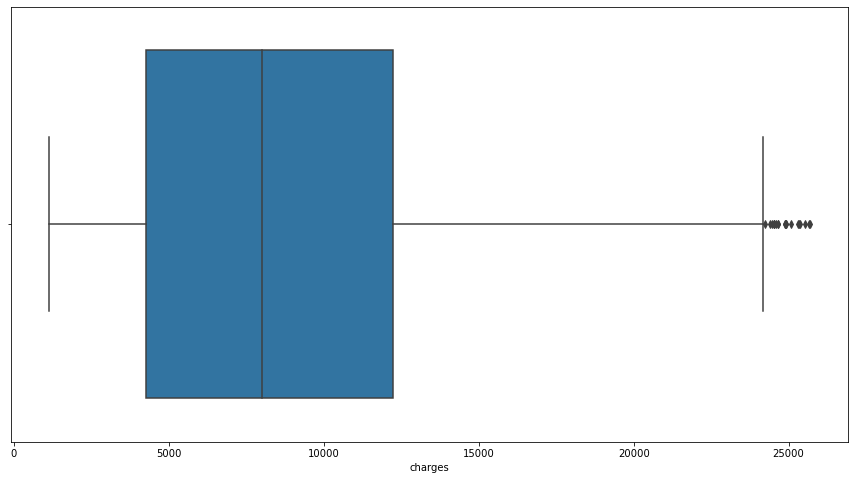

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.charges)

In [47]:
data = Insurance.charges
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 8986.649611396306
std. deviation is 5906.566084258025


In [50]:
threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='charges'>

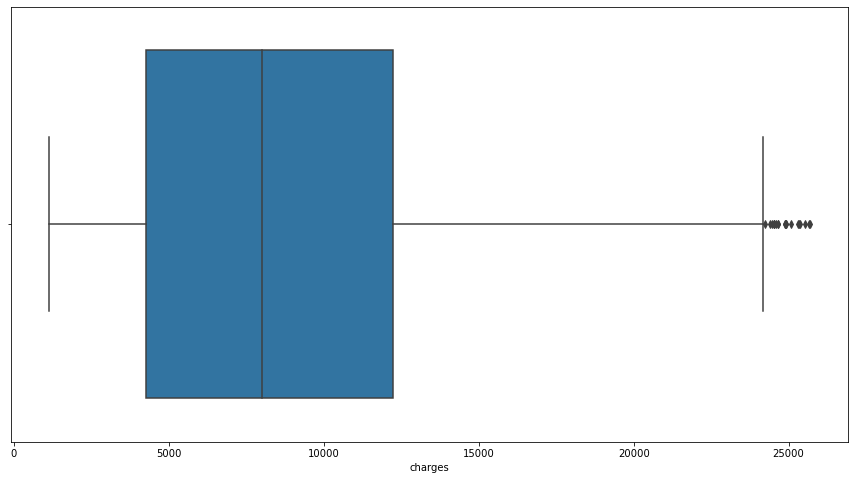

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.charges)

Isolate all the categorical column names into a list named ‘categorical’.

In [52]:
categorical = [var for var in Insurance.columns if Insurance[var].dtype=='O']
print('There are {} categorical variables namely:'.format(len(Numerical)))
print(categorical)

There are 4 categorical variables namely:
['sex', 'smoker', 'region']


In [54]:
numerical_discrete

['children']

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='children'>

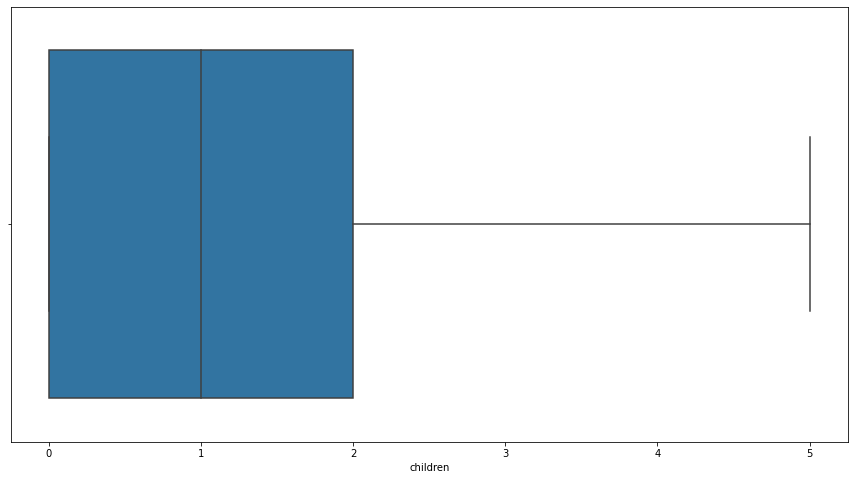

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.children)

In [57]:
categorical

['sex', 'smoker', 'region']

In [58]:
Insurance.region.value_counts()

southeast    286
southwest    285
northwest    285
northeast    282
Name: region, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
Insurance.loc[:, 'sex'] = le.fit_transform(Insurance.loc[:, 'sex'])

In [62]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [63]:
Insurance.loc[:, 'smoker'] = le.fit_transform(Insurance.loc[:, 'smoker'])

In [64]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [65]:
Insurance.loc[:, 'region'] = le.fit_transform(Insurance.loc[:, 'region'])

In [66]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex'>

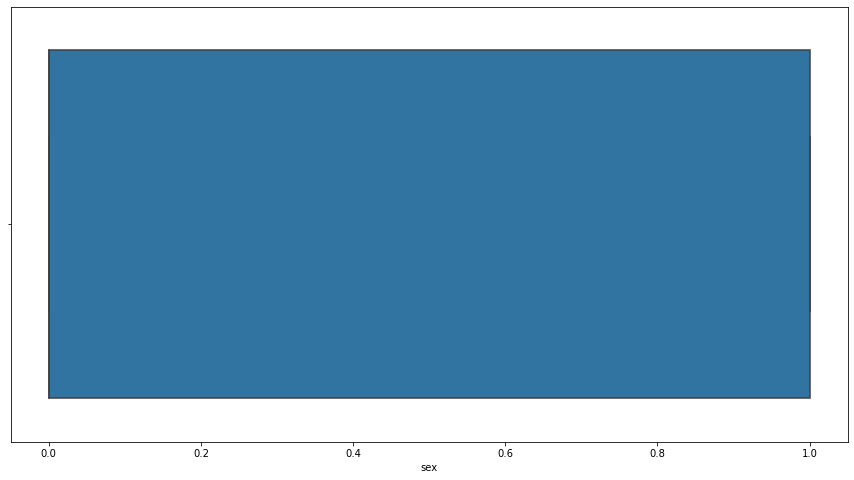

In [67]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.sex)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='region'>

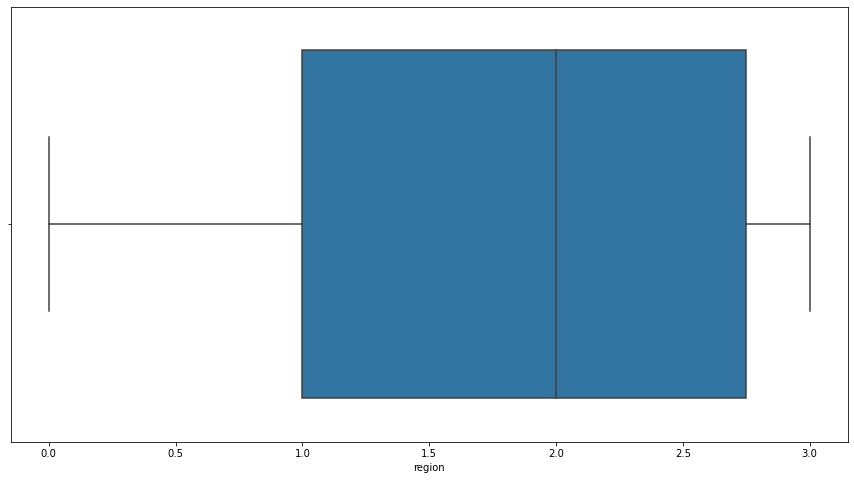

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.region)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='smoker'>

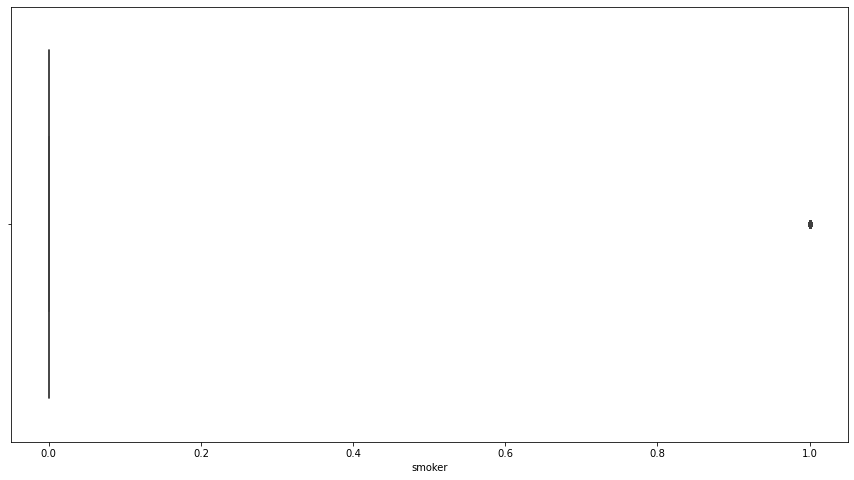

In [70]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.smoker)

<AxesSubplot:>

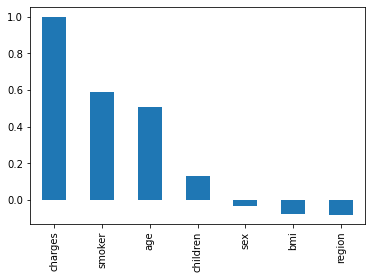

In [71]:
Insurance.corr()['charges'].sort_values(ascending = False).plot(kind='bar')

Sex seems to have the least corelation with the charges. So it is the column I would drop to remain with 5 features.

In [72]:
Insurance = Insurance.drop('sex', axis=1)

In [73]:
Insurance.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520


In [75]:
from sklearn.model_selection import train_test_split

In [82]:
X = Insurance.iloc[:,:-1]

In [83]:
y = Insurance.iloc[:,5]

In [84]:
X.head()

,age,bmi,children,smoker,region
0,19,27.900,0,1,3
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,1
4,32,28.880,0,0,1


In [85]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64